## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import scipy.io

from sklearn.decomposition import PCA

# from topoplot import topoplot

## Readind the data

In [4]:
mat = scipy.io.loadmat('./../data/EEG tubingen/TMS-EEG_Tubingen_ver2.mat')

In [5]:
EEG = mat['EEG']
datastruct = EEG['data']
datam = datastruct[0][0]

## Read sensor coordinates

In [20]:
sensorloc = pd.read_excel('./../data/docs/chanlocs.xlsx')

In [21]:
sensorloc.head()

,labels,type,theta,radius,X,Y,Z,sph_theta,sph_phi,sph_radius,urchan,ref
0,'Fp1','EEG',-17.926,0.514989,8.078401e+01,26.133014,-4.001085,17.926,-2.698,85,1,'average'
1,'Fp2','EEG',17.926,0.514989,8.078401e+01,-26.133014,-4.001085,-17.926,-2.698,85,2,'average'
2,'F3','EEG',-39.947,0.344594,5.755106e+01,48.200427,39.869712,39.947,27.973,85,3,'average'
3,'F4','EEG',39.897,0.344500,5.758403e+01,-48.142596,39.891983,-39.897,27.990,85,4,'average'
4,'C3','EEG',-90.000,0.266689,3.868125e-15,63.171281,56.871691,90.000,41.996,85,5,'average'


In [22]:
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

def R2P(x):
    return abs(x), angle(x)

th = sensorloc['theta']
radius = sensorloc['radius']

lX = []
lY = []
for i in range(len(th)):
    z = P2R(radius[i], np.pi*th[i]/180)
    lX.append(np.real(z))
    lY.append(np.imag(z))
    
Rd = np.max(radius);
plotrad = np.min([1.0,np.max(Rd)*1.02]);
plotrad = np.max([plotrad,0.5]);
                
lX = np.asarray(lX) / plotrad
lY = np.asarray(lY) / plotrad

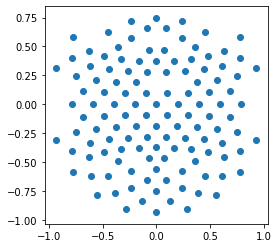

In [26]:
plt.figure(figsize=(4,4))
plt.scatter(lY, lX)
plt.show()

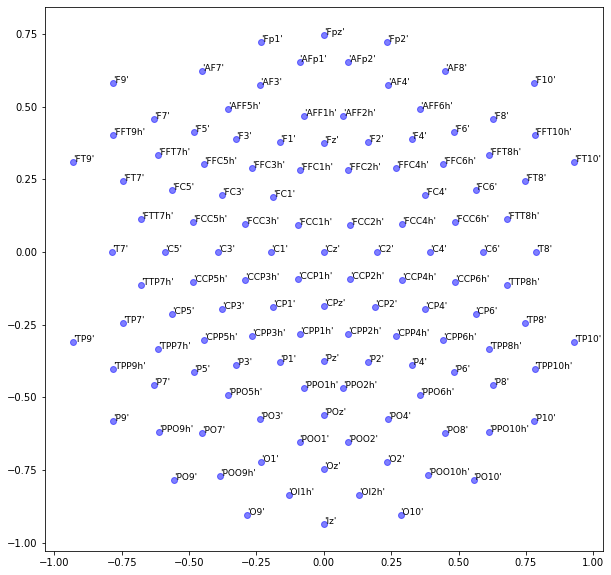

In [23]:
types = sensorloc['labels']

plt.figure(figsize=(10,10))    
for i,type in enumerate(types):
    x = lY[i]
    y = lX[i]
    plt.scatter(x, y, marker='o', color='blue', alpha = 0.5)
    plt.text(x, y, type, fontsize=9)
plt.show()

## Plotting

### Averaged signals

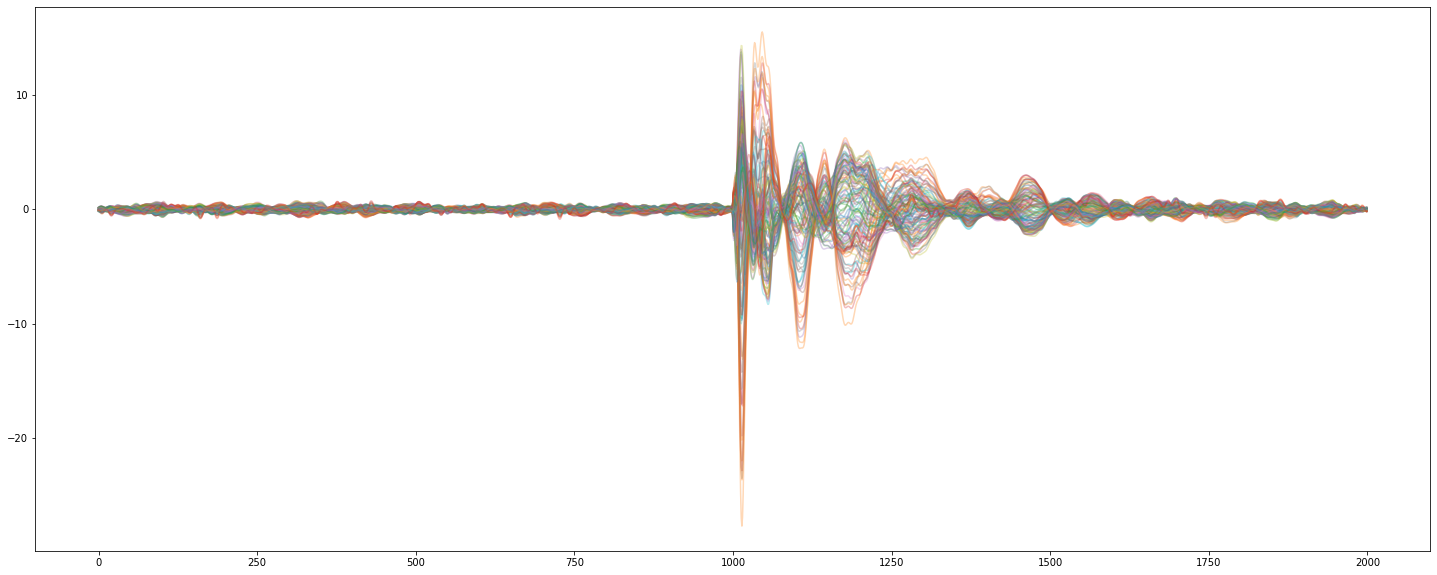

In [27]:
meanmat = np.mean(datam, axis=2)

plt.figure(figsize=(25, 10))
for row in meanmat:
    plt.plot(row, alpha = 0.3)

### Topography, signal amplitudes at sensor locations at time point $t$

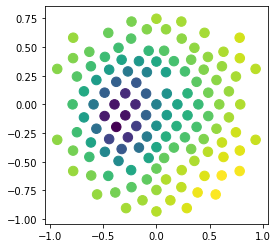

In [28]:
t = 1100

plt.figure(figsize=(4, 4))
plt.scatter(lY, lX, c=meanmat[:, t], s=90)
#plt.axis('off')


### Same with continuous space

In [29]:
from __future__ import print_function 
from __future__ import division
from __future__ import absolute_import

import scipy.interpolate
import matplotlib 

def topoplot(X, Y, amplitudes):

    # some parameters
    N = 300             # number of points for interpolation
    xy_center = [0,0]   # center of the plot

    meanR = amplitudes
    x = X
    y = Y
    z = meanR

    xi = np.linspace(-1, 1, N)
    yi = np.linspace(-1, 1, N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')


    # make figure
    fig = plt.figure()
    
    ax = fig.add_subplot(111, aspect= 1)

    # use different number of levels for the fill and the lines
    CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1)
    ax.contour(xi, yi, zi, 15, colors = "grey", zorder = 2)

    # make a color bar
    cbar = fig.colorbar(CS, ax=ax)

    # add the data points
    # I guess there are no data points outside the head...
    ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)


    # make the axis invisible 
    for loc, spine in ax.spines.items():
        # use ax.spines.items() in Python 3
        spine.set_linewidth(0)

    # remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # set axes limits
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    plt.show() 

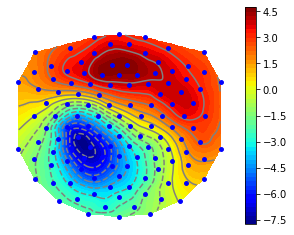

In [30]:
t = 1200
topoplot(lY, lX, meanmat[:, t])

## PCA

[0.72504395 0.16336249]
[515.76544 244.81964]
(125, 2)


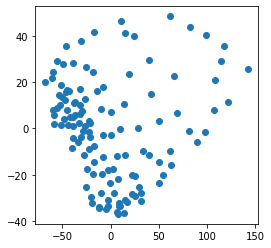

In [34]:
pca = PCA(n_components=2)

r = pca.fit_transform(meanmat)  
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  
print(r.shape)

plt.figure(figsize=(4, 4))
plt.scatter(r[:,0], r[:, 1])
plt.show()

## PCA components plots

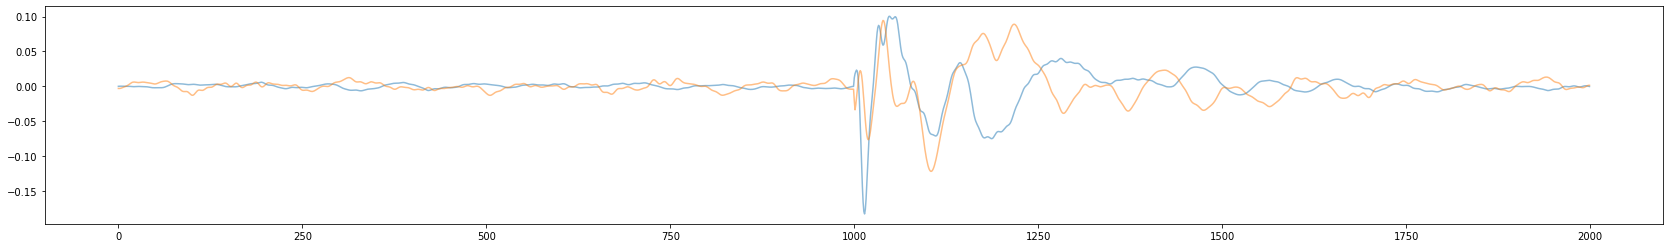

In [33]:
x = range(pca.components_.shape[1])

plt.figure(figsize=(29, 4))
plt.plot(x, pca.components_.T, alpha=0.5)
plt.show()